#  EDA of 911 Calls Data Capstone Kaggle Project. by I.K Emmanuel

For this project I would be analyzing some 911 (Emergency) Calls. and the data was obtained from [Kaggle](www.kaggle.com). 

The fiels in the data include: 
* lat: Latitude of where the call was sent from. ( dtype: float64  )
* lng: Longitude of where the call was sent from. (dtype: float64)
* decs: a brief descriptionn of the emergency call. (dtype: String object) 
* zip: Zipcode of caller. (dtype:float64)
* title: Title of call  . (dtype: String object)
* timeStamp: data and time  in format YYYY-MM-DD HH:MM:SS (dtype: String object) 
* twp: Township of caller (dtype: String object)
* addr: Address of caller (dtype: String object)
* e: Dummy variable that is set to 1 (dtype: int64)

## Data and Library Set-up

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#now we read the data ('911.csv' file) into a dataframe df. and then we preview the first 5 rows by calling the dataframe 
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
# checking to see data types 
df.dtypes 

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

In [5]:
# checking information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [11]:
# checking  to see unique entries 
lst  = [df['title'].nunique(), df['zip'].nunique(),df['twp'].nunique()]
lst

[110, 104, 68]

As we can see there are 110 unique call Titles, 104 unique zipcodes, and calls from 68 different townships

In [13]:
# lets try to classify reasons for emergency call by examining the call title
df['title'].head(20)

0          EMS: BACK PAINS/INJURY
1         EMS: DIABETIC EMERGENCY
2             Fire: GAS-ODOR/LEAK
3          EMS: CARDIAC EMERGENCY
4                  EMS: DIZZINESS
5                EMS: HEAD INJURY
6            EMS: NAUSEA/VOMITING
7      EMS: RESPIRATORY EMERGENCY
8           EMS: SYNCOPAL EPISODE
9     Traffic: VEHICLE ACCIDENT -
10    Traffic: VEHICLE ACCIDENT -
11    Traffic: VEHICLE ACCIDENT -
12    Traffic: VEHICLE ACCIDENT -
13    Traffic: VEHICLE ACCIDENT -
14    Traffic: VEHICLE ACCIDENT -
15    Traffic: VEHICLE ACCIDENT -
16     EMS: RESPIRATORY EMERGENCY
17                 EMS: DIZZINESS
18          EMS: VEHICLE ACCIDENT
19    Traffic: DISABLED VEHICLE -
Name: title, dtype: object

from observing the call titles, we can classify the call by looking at the title before the ':'delimiter. e.g. EMS- could be emergency situation, and Traffic- could be all calls related to traffic 

In [14]:
# We will create a new column called 'reason' by seperating the title column and splitting it by the : delimeter 
df['reason']= df['title'].apply(lambda title: title.split(':')[0])

In [15]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [16]:
#lets view the most occuring reason for emergency call 
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

we can tell that EMS was the most occuring reason. followed by traffic, then fire.  
we can also visualize this to see it better

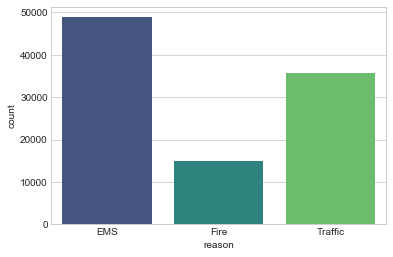

In [19]:
sns.countplot(x = 'reason', data = df, palette='viridis')

## Now let's explore the various time of calls

In [28]:
df.timeStamp.head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [25]:
# the timeStamp column is a string obeject, to interact with it as a date-time obeject, we would have to convert it 
type(df['timeStamp'].iloc[0])

str

In [26]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [27]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

### With this, we can now grab things like: year, month, day , hour . minute in which the call was made

So now i will create new columns for: Month, Day of the week , and Hour 

In [31]:
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['date'] = df ['timeStamp'].apply(lambda t: t.date())


In [44]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,thu,2015-12-10


Now we can map the day of the week to the conventional Monday, tuesday .... Sunday. 
in python notation:  
0 - Monday.  
1 - Tuesday.   
2 - wednesday.   
3 - Thursday.   
4 - Friday.   
5 - Saturday.   
6 - Sunday.  

Now, what i would do is define a dictionary tht would map these numbers to the ctuall day of the week. 

In [33]:
weekmapp =  { 0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'}

In [34]:
df['day of week'] = df['day of week'].map(weekmapp)

In [50]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,thu,2015-12-10


# Now we can Plot and the various calls for the various days of the week 

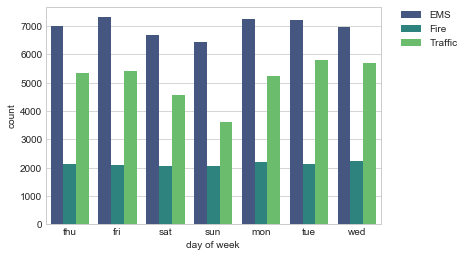

In [39]:
sns.countplot (x = 'day of week', data = df, hue= 'reason', palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc =2, borderaxespad  = 0)

we can now see how the  emergency calls of each day of the week varies. and we can also view that of 'month' the same way. 

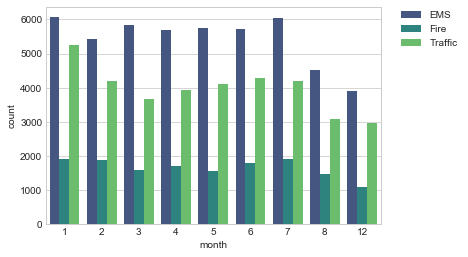

In [40]:
sns.countplot (x = 'month', data = df, hue= 'reason', palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc =2, borderaxespad  = 0)


It is observed that months 9,10, 11 are misssing that would be september, october, november. 

# Now we can explore the calls by date of call

We will group the date column with the count() aggregate and create a plot of the count of the emergency calls 

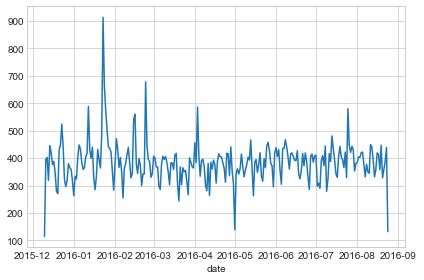

In [43]:
df.groupby('date').count()['twp'].plot()
plt.tight_layout()

## For calls concerning Traffic related issues:

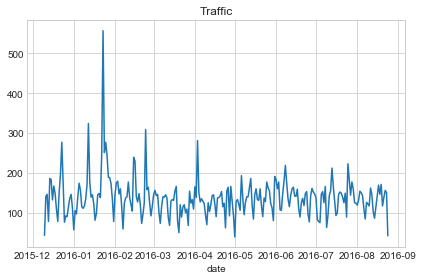

In [51]:
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

## For calls concerning 'EMS' related issues:

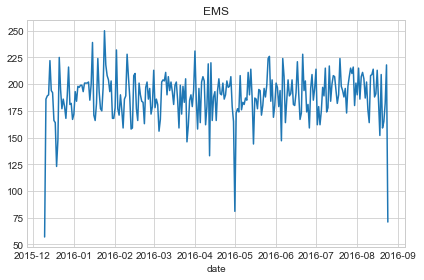

In [53]:
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

## For calls concerning ' Fire' related issues:

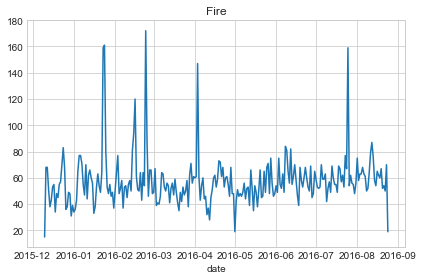

In [55]:
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

 Now let's create heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 

In [56]:
dayHour = df.groupby(by=['day of week','hour']).count()['reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


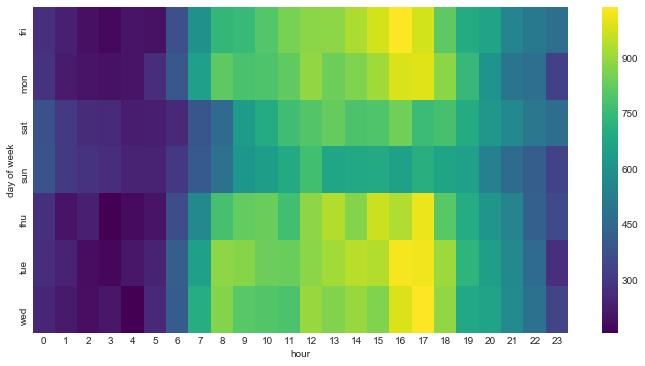

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

In [58]:
dayMonth = df.groupby(by=['day of week','month']).count()['reason'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
sat,2291,1441,1266,1734,1444,1388,1695,1099,978
sun,1960,1229,1102,1488,1424,1333,1672,1021,907
thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


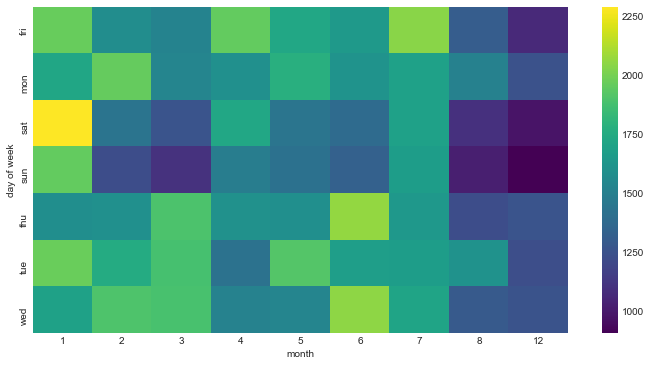

In [59]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')